In [38]:
import pandas as pd
import json



df_letters = pd.read_csv('data/letters_with_opium_and_spices.tsv',sep='\t').dropna(subset=['year']).astype({'year':'int',
                                                                                                   'month':'int',
                                                                                                   'day':'int'})
# Uncomment the line below if you want to work with all commodities:

#df_letters = pd.read_csv('data/letters_with_commodities_latest.tsv',sep='\t').dropna(subset=['year']).astype({'year':'int',
#                                                                                                   'month':'int',
#                                                                                                   'day':'int'})

In [39]:
from datetime import date
df_letters['date'] = df_letters.apply(lambda x: date(year = x['year'], month = x['month'], day = x['day']), axis=1)

In [40]:
df_commodities_by_date_raw = df_letters[['date','commodities']]

In [41]:
df_commodities_by_date = df_commodities_by_date_raw[df_commodities_by_date_raw['commodities'] != '{}']

In [42]:
df_commodities_by_date['commodities_ids'] = df_commodities_by_date['commodities'].map(lambda x: list(json.loads(x).keys()))

/home/vprovat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_commodities_by_date.drop_duplicates(subset=['date','commodities'], inplace=True)

/home/vprovat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_commodities = pd.read_csv('data/commodities_latest.tsv',sep='\t') # Globalise commodities, their ids and labels

In [45]:
label_by_uri = df_commodities.set_index('uri')['main_label'].to_dict()

In [46]:
def get_preferred_label(url):
    if url in label_by_uri:
        return label_by_uri[url]
    print('Failed to find label for ',url)


In [47]:
df_commodities_by_date_flat = df_commodities_by_date.explode('commodities_ids')

In [48]:
df_commodities_by_date_flat['url'] = df_commodities_by_date_flat['commodities_ids']
df_commodities_by_date_flat.drop(['commodities', 'commodities_ids'],axis=1, inplace=True)


In [49]:
df_commodities_by_date_flat['label'] = df_commodities_by_date_flat['url'].map(get_preferred_label)
df_commodities_by_date_flat

,date,url,label
0,1618-10-05,https://digitaalerfgoed.poolparty.biz/globalis...,Peper
0,1618-10-05,https://digitaalerfgoed.poolparty.biz/globalis...,Foelie
1,1618-11-12,https://digitaalerfgoed.poolparty.biz/globalis...,Peper
2,1618-09-29,https://digitaalerfgoed.poolparty.biz/globalis...,Peper
2,1618-09-29,https://digitaalerfgoed.poolparty.biz/globalis...,Foelie
...,...,...,...
898,1792-10-12,https://digitaalerfgoed.poolparty.biz/globalis...,Kaneel
899,1792-10-30,https://digitaalerfgoed.poolparty.biz/globalis...,Peper
901,1793-01-31,https://digitaalerfgoed.poolparty.biz/globalis...,Opium
901,1793-01-31,https://digitaalerfgoed.poolparty.biz/globalis...,Peper


In [50]:
df_commodities_by_date_flat.to_csv('data/commodities_per_date.tsv',sep='\t')

In [51]:
all_commodities = set(df_commodities_by_date_flat['label'].tolist())
sorted(all_commodities)

['Foelie', 'Kaneel', 'Nootmuskaat', 'Opium', 'Peper']

In [52]:
len(all_commodities)

5

### Old code begins here, remove or refactor when we're sure we don't need it

In [53]:
# Time to visualise - let's try something and see what happens

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import textwrap
def wrap_labels(ax, width=20, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [16]:
df_commodities_flat = df_commodities_flat.sort_values(by=['date','label'])

/var/folders/w6/rvcq1vxj6p58nmp30brgs8dm0000gn/T/ipykernel_12338/2620315314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.stripplot(x='date',y='label', data=df_commodities_flat,


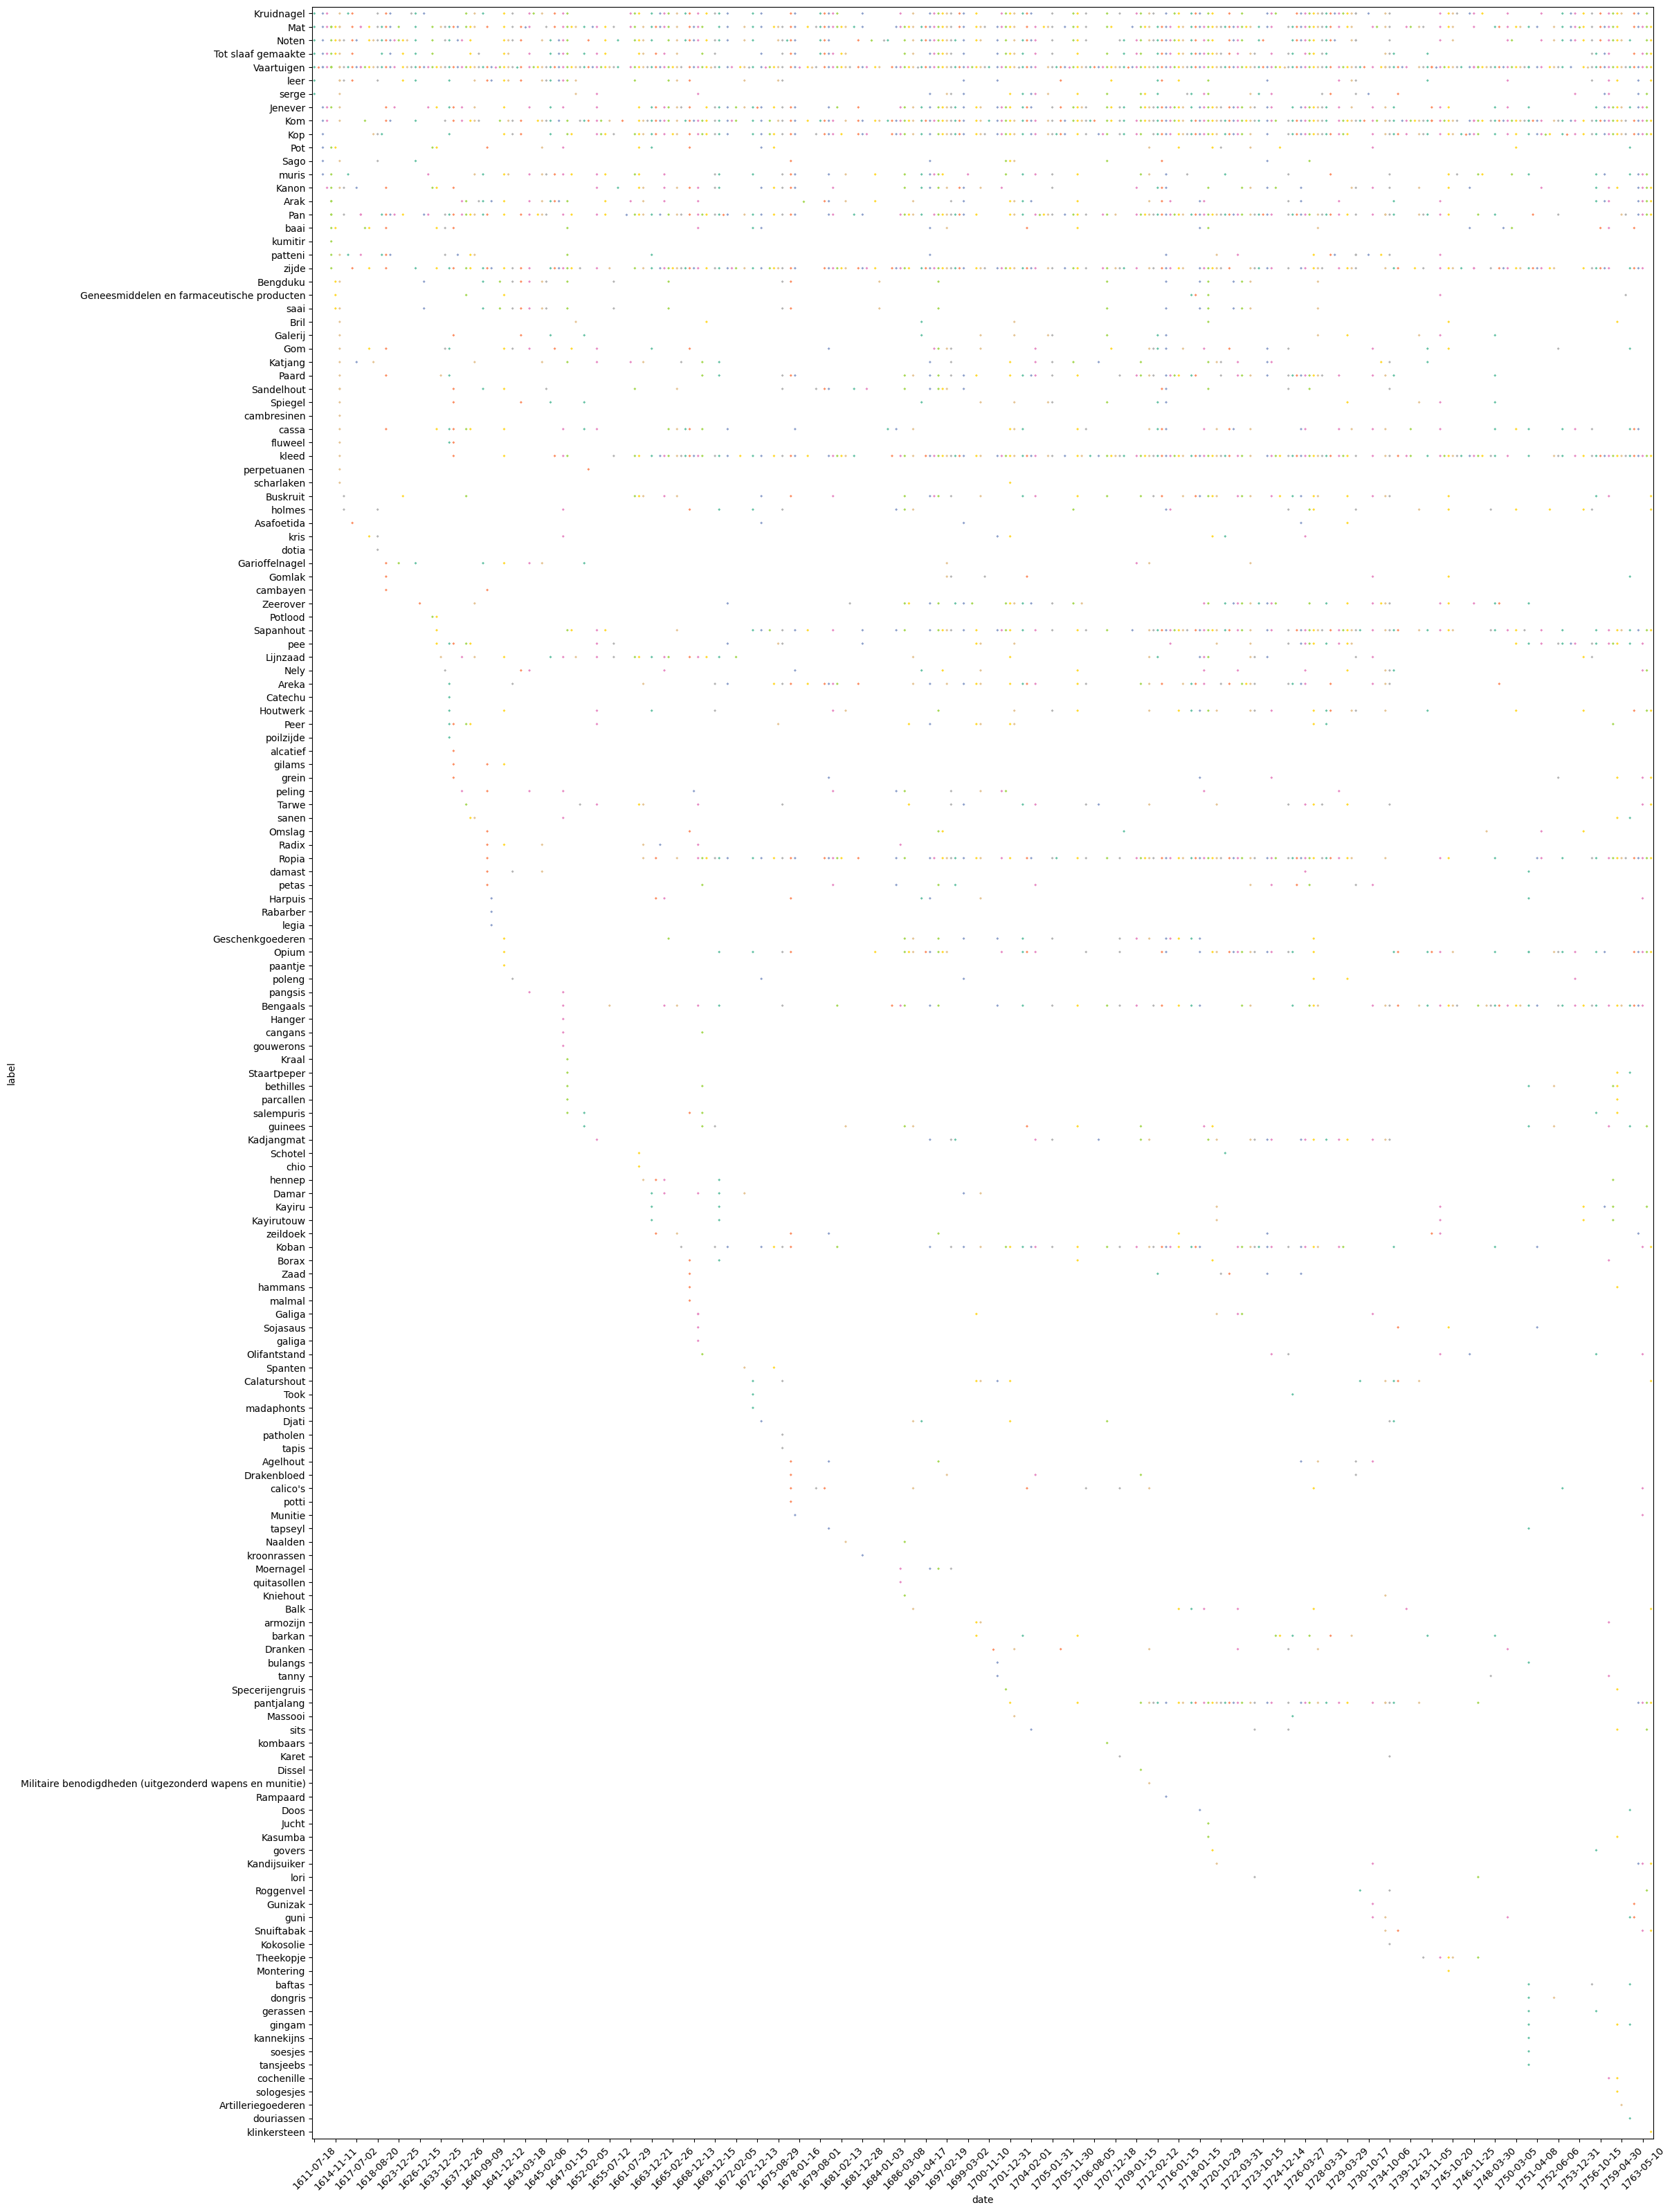

In [153]:
plt.figure(figsize=(25,40))
plot = sns.stripplot(x='date',y='label', data=df_commodities_flat,
                    palette='Set2',
                     size=2,jitter=False, 
                     marker='D')#, alpha=.50)
plt.xticks(rotation=45)

new_ticks = [i.get_text() for i in plot.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])

# Get the first two and last y-tick positions.
miny, nexty, *_, maxy = plot.get_yticks()

# Compute half the y-tick interval (for example).
eps = (nexty - miny) / 2  # <-- Your choice.

# Adjust the limits.
plot.set_ylim(maxy+eps, miny-eps)
# wrap_labels(plot)
plt.savefig('commodities_over_time.png',bbox_inches="tight")

In [155]:
# The graph is huge, try looking at broader concepts in the next notebook